<a href="https://colab.research.google.com/github/Adrielguza2005/Simulacion/blob/main/Unidad3/Distribucion_Poisson_y_binominal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Llegadas simuladas por hora:
[18, 9, 13, 4, 12, 17, 9, 13, 13, 11, 7, 10, 12, 5, 5, 8, 8, 11, 12, 5, 6, 9, 12, 7, 17, 3, 11, 12, 4, 17, 9, 9, 18, 22, 7, 8, 14, 9, 10, 11, 9, 10, 7, 9, 17, 19, 8, 13, 17, 13, 14, 5, 18, 12, 11, 8, 12, 9, 14, 12, 15, 14, 9, 10, 5, 10, 11, 14, 4, 6, 9, 12, 14, 15, 11, 11, 7, 13, 10, 17, 7, 8, 5, 10, 9, 7, 13, 8, 14, 10, 11, 6, 9, 12, 8, 12, 18, 10, 11, 10, 11, 7, 11, 12, 16, 19, 14, 6, 8, 10, 6, 12, 9, 9, 10, 18, 15, 13, 14, 10, 9, 12, 12, 14, 13, 11, 11, 7, 12, 10, 10, 9, 7, 7, 8, 9, 10, 16, 17, 6, 16, 11, 10, 16, 7, 5, 11, 9, 10, 16, 13, 15, 22, 13, 7, 11, 19, 5, 3, 12, 10, 11, 12, 5, 9, 11, 13, 14, 16, 7, 8, 11, 10, 8, 9, 10, 10, 10, 15, 13, 11, 11, 9, 11, 11, 7, 9, 14, 12, 8, 11, 10, 9, 14, 8, 16, 7, 11, 15, 10, 12, 9, 10, 12, 10, 15, 9, 8, 6, 7, 2, 10, 11, 13, 5, 9, 13, 7, 9, 10, 8, 11, 13, 11, 13, 11, 5, 7, 9, 7, 7, 6, 8, 9, 12, 14, 10, 16, 12, 11, 8, 7, 12, 10, 12, 5, 10, 5, 7, 7, 11, 17, 9, 8, 8, 11, 10, 5, 9, 14, 7, 8, 7, 5, 3, 11, 15, 3, 5, 8, 5,

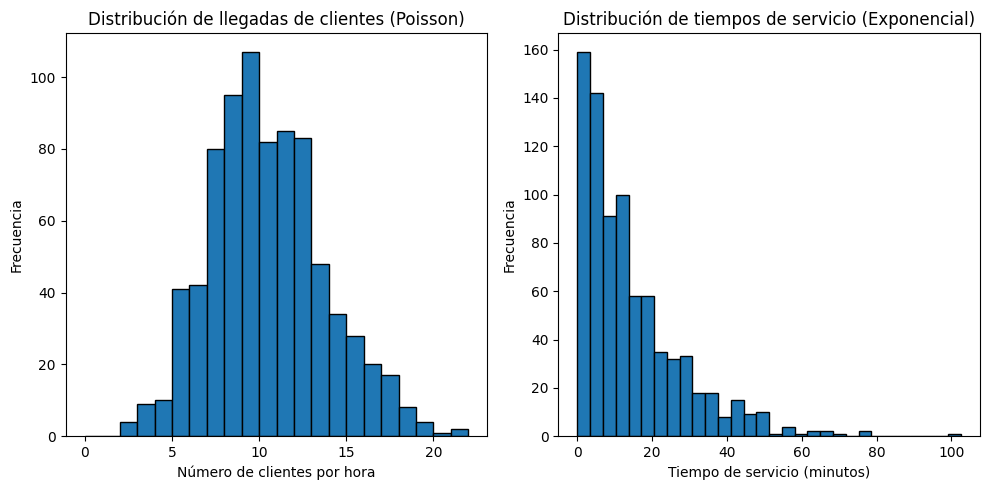

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parámetros del modelo
lambda_llegadas = 10  # Llegadas promedio de clientes por hora (Poisson)
tiempo_servicio_promedio = 15  # Tiempo promedio de servicio en minutos (Exponencial)
lambda_servicio = 1 / tiempo_servicio_promedio  # Tasa para la distribución exponencial

# Generar llegadas de clientes usando la distribución Poisson (transformada inversa)
def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)
        if U <= F_k:
            return k
        k += 1

# Generar tiempos de servicio usando la distribución Exponencial (transformada inversa)
def exponencial_inverse_transform(lambda_servicio, U):
    return -math.log(1 - U) / lambda_servicio

# Simulación de 8 horas en la tienda departamental
num_horas = 8
num_simulaciones = 100  # Número de simulaciones
llegadas_simuladas = []
servicios_simulados = []

# Simulamos para cada hora
for _ in range(num_horas):
    # Generamos un número de clientes por hora (Poisson)
    U_llegadas = np.random.uniform(0, 1, num_simulaciones)
    llegadas_hora = [poisson_inverse_transform(lambda_llegadas, u) for u in U_llegadas]
    llegadas_simuladas.extend(llegadas_hora)

    # Generamos los tiempos de servicio para cada cliente (Exponencial)
    U_servicio = np.random.uniform(0, 1, len(llegadas_hora))
    tiempos_servicio = [exponencial_inverse_transform(lambda_servicio, u) for u in U_servicio]
    servicios_simulados.extend(tiempos_servicio)

# Mostrar resultados
print("Llegadas simuladas por hora:")
print(llegadas_simuladas)
print("Tiempos de servicio (en minutos) simulados:")
print(servicios_simulados)

# Graficar los resultados
plt.figure(figsize=(10, 5))

# Graficar llegadas
plt.subplot(1, 2, 1)
plt.hist(llegadas_simuladas, bins=range(0, max(llegadas_simuladas)+1), edgecolor='black')
plt.title("Distribución de llegadas de clientes (Poisson)")
plt.xlabel("Número de clientes por hora")
plt.ylabel("Frecuencia")

# Graficar tiempos de servicio
plt.subplot(1, 2, 2)
plt.hist(servicios_simulados, bins=30, edgecolor='black')
plt.title("Distribución de tiempos de servicio (Exponencial)")
plt.xlabel("Tiempo de servicio (minutos)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()